In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### FFT

In [ ]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)


In [ ]:
from scipy import fftpack

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)


In [ ]:
pidxs = np.where(sample_freq > 0 )
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

In [ ]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./ period) # check that correct freq is found

In [ ]:
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

In [ ]:
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, np.real(main_sig), linewidth= 3 )
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

### Optimization

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
    return x ** 2 + 10* np.sin(x)

In [ ]:
x = np.arange(-10, 10, 0.1)

plt.figure()
plt.plot(x, f(x))
plt.show()

In [ ]:
optimize.fmin_bfgs(f, 0, disp = True  )

In [ ]:
# ensure global minimum with basin-hopping
optimize.basinhopping(f, 0)

In [ ]:
# local minimum
xmin_local = optimize.fminbound(f, 0 , 10 )
xmin_local

In [ ]:
# root finding
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

In [ ]:
root2 = optimize.fsolve(f, -2.5)  # our initial guess is 1
root2

In [ ]:
xdata = np.linspace(- 10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

In [ ]:
def f2(x, a, b):
    return a * x ** 2 + b * np.sin(x)

In [ ]:
guess = [ 2 , 2 ]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)

In [ ]:
params, params_covariance

### Statistics and random numbers

In [ ]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5 )

In [ ]:
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])

In [ ]:
from scipy import stats
b = stats.norm.pdf(bins) # norm is a distribution

In [ ]:
plt.figure()
plt.plot(bins, histogram)
plt.plot(bins, b)

In [ ]:
stats.scoreatpercentile(a, 50)

In [ ]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

### Interpolation

In [ ]:
measured_time = np.linspace(0 , 1 , 10)
noise = (np.random.random(10)*2 - 1 )*1e-1
measures = np.sin(2*np.pi*measured_time) + noise

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
linear_interp = interp1d(measured_time, measures)

computed_time = np.linspace(0 , 1 , 50)
linear_results = linear_interp(computed_time)

In [ ]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

In [ ]:
plt.figure()
plt.plot(measured_time, measures, 'o', label='Measurement')
plt.plot(computed_time, linear_results, label='Linear Interpolation', linewidth=1.5)
plt.plot(computed_time, cubic_results, label='Cubic Interpolations', linewidth=1.5)
plt.legend(loc='best')

### Integrate

In [ ]:
from scipy.integrate import quad

In [ ]:
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res,1)

In [1]:
from scipy.integrate import odeint

In [2]:
odeint?

In [12]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return - 2 * ypos

In [13]:
counter = np.zeros((1 ,), dtype= np.uint16)

In [14]:
from scipy.integrate import odeint
time_vec = np.linspace(0 , 4 , 40)
yvec, info = odeint(calc_derivative, 1 , time_vec,
                    args= (counter,), full_output= True)

In [17]:
mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m

In [18]:
eps = cviscous / ( 2 * mass * np. sqrt(kspring/ mass))

In [19]:
nu_coef = cviscous / mass
om_coef = kspring / mass

In [20]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1 ], - nuc * yvec[ 1 ] - omc * yvec[ 0 ])

time_vec = np.linspace(0 , 10, 100 )
yarr = odeint(calc_deri, ( 1 , 0 ), time_vec, args= (nu_coef, om_coef))

In [23]:
time_vec.shape

(100L,)

In [22]:
yarr.shape

(100L, 2L)

<IPython.core.display.Javascript object>


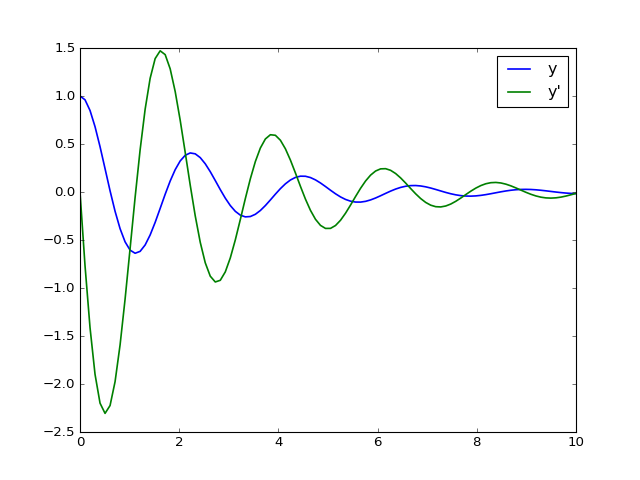

In [25]:
plt.figure()
plt.plot(time_vec, yarr[:,0], label='y', linewidth=1.5)
plt.plot(time_vec, yarr[:,1], label="y'", linewidth=1.5)
plt.legend(loc='best')

### Signal

In [28]:
from scipy import signal

In [29]:
t = np.linspace(0 , 5 , 100 )
x = t + np.random.normal(size=100)

<IPython.core.display.Javascript object>


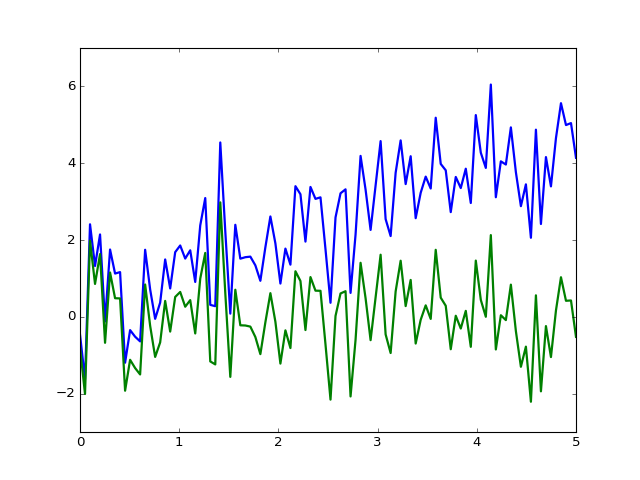

In [32]:
plt.figure()
plt.plot(t, x, linewidth=2)
plt.plot(t, signal.detrend(x), linewidth=2)

In [34]:
t = np.linspace(0 , 5 , 100 )
x = np.sin(t)

<IPython.core.display.Javascript object>


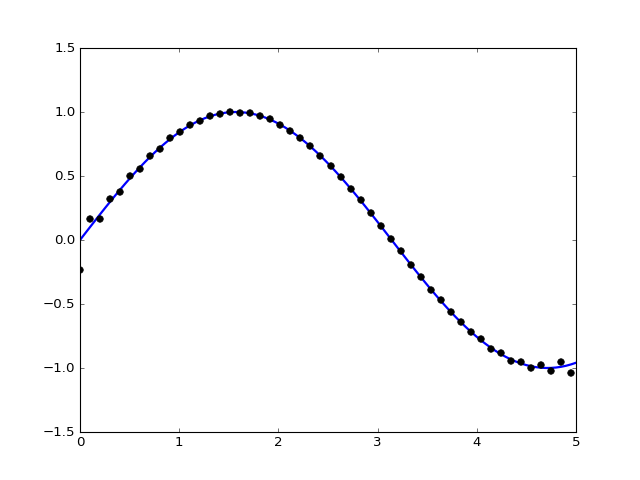

In [45]:
plt.figure()
plt.plot(t, x, linewidth = 2 )
plt.plot(t[::2], signal.resample(x, 50 ), 'ko')

### Image

In [1]:
from scipy import ndimage

In [2]:
from scipy import misc
face = misc.face(gray= True)
shifted_face = ndimage.shift(face, ( 50 , 50 ))
shifted_face2 = ndimage.shift(face, (50 , 50 ), mode ='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[ 50: -50, 50: -50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536L, 2048L)

In [3]:
from scipy import misc
face = misc.face(gray= True)
face = face[:512, -512:] # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma= 3)
median_face = ndimage.median_filter(noisy_face, size= 5)

from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5 ))

<IPython.core.display.Javascript object>


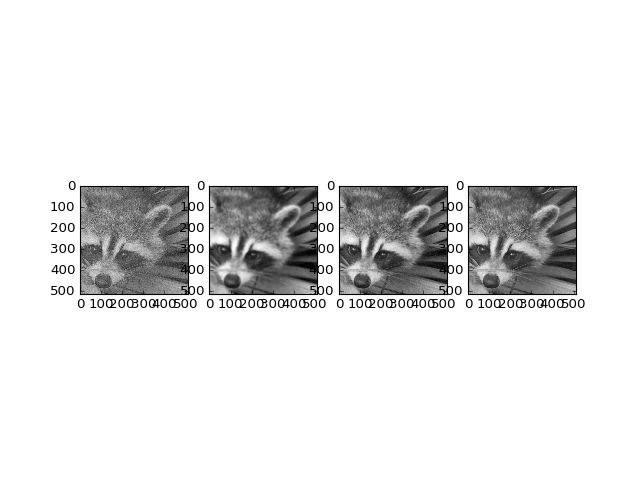

In [8]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(noisy_face, plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(blurred_face, plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(median_face, plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(wiener_face, plt.cm.gray)

In [9]:
x, y = np.indices((100, 100))
sig = np.sin(2 * np.pi * x / 50.) * np.sin(2 * np.pi * y / 50.) * (1 + x * y / 50. ** 2) ** 2
mask = sig > 1

In [10]:
labels, nb = ndimage. label(mask)
nb

8

In [11]:
areas = ndimage.sum(mask, labels, range( 1 , labels. max() + 1 ))

In [12]:
maxima = ndimage.maximum(sig, labels, range ( 1 , labels. max() + 1 ))

In [54]:
ndimage.find_objects(labels==4)

[(slice(30L, 48L, None), slice(30L, 48L, None))]

In [107]:
np.diag([1,2,3]).ravel().reshape((9,1)) + + np.zeros((1,9))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])

<IPython.core.display.Javascript object>


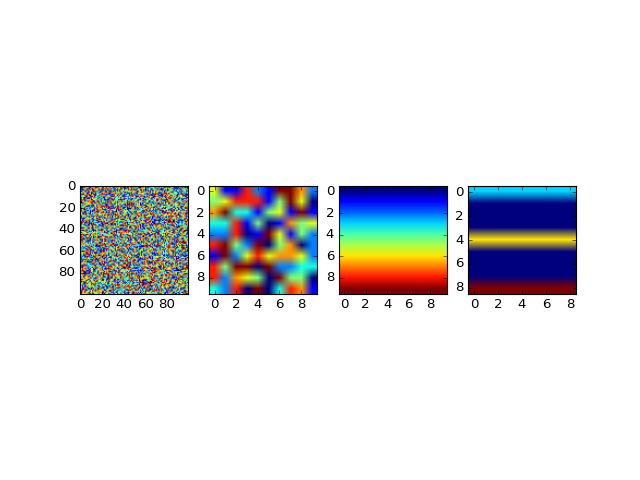

In [109]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(255*np.random.rand(100,100))
plt.subplot(1,4,2)
plt.imshow(np.random.randint(1,10,(10,10)))
plt.subplot(1,4,3)
plt.imshow(np.arange(10).reshape((10,1)) + np.zeros((1,10)))
plt.subplot(1,4,4)
plt.imshow(np.diag([1,2,3]).ravel().reshape((9,1)) + + np.zeros((1,9)))

In [114]:
%psearch np.dia*

In [117]:
np.lookfor('convolution')

Search results for 'convolution'
--------------------------------
numpy.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.polymul
    Find the product of two polynomials.
numpy.bartlett
    Return the Bartlett window.
numpy.correlate
    Cross-correlation of two 1-dimensional sequences.


### Sparse

In [2]:
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as plt

In [6]:
data = np.arange(12).reshape((3 , 4 )) + 1

In [13]:
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [9]:
offsets = np.array([0, -1, 2])

In [10]:
mtx = sps.dia_matrix((data, offsets), shape=(4, 4))

In [11]:
mtx.data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
mtx.todense()

matrix([[ 1,  0, 11,  0],
        [ 5,  2,  0, 12],
        [ 0,  6,  3,  0],
        [ 0,  0,  7,  4]])

In [22]:
sps.dia_matrix?

In [33]:
sps.dia_matrix(data, shape=(4, 4)).todense()

matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [36]:
sps.dia_matrix((data, [0, -1, 2]), shape=(4, 4)).todense()

matrix([[ 1,  0, 11,  0],
        [ 5,  2,  0, 12],
        [ 0,  6,  3,  0],
        [ 0,  0,  7,  4]])

In [37]:
sps.dia_matrix((data, [0, -1, 2]), shape=(4, 4)).toarray()

array([[ 1,  0, 11,  0],
       [ 5,  2,  0, 12],
       [ 0,  6,  3,  0],
       [ 0,  0,  7,  4]])

## Scribbles

In [ ]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
Y = np.vstack((y,y*2)).T

In [ ]:
Y

In [ ]:
print x.shape
print y.shape
print Y.shape

In [ ]:
f = interpolate.interp1d(x, Y, axis=0)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew) # use interpolation function returned by `interp1d`
plt.plot(x, Y, 'o', xnew, ynew, '-')
plt.show()

In [ ]:
x = np.array([0,1,2,3],dtype=np.float32)
y = x*2

XY = np.vstack((x,y)).T
XY.shape

In [ ]:
XY

In [ ]:
import numpy as np
import scipy

def logtolin(x,y):
    # Takes the points of a 2D logarithmic profile and returns the all points
    f = scipy.interpolate.interp1d(np.log10(x), np.log10(y))
    xnew = np.arange(x[0], x[-1] + 1, 1)
    ynew = 10**f(np.log10(xnew))
    return xnew, ynew

In [ ]:
a = np.arange(1.,11.)[:, np.newaxis] 

In [ ]:
b = np.arange(1.,11.).T

In [ ]:
print a.shape
print b.shape

In [ ]:
np.log(10)

In [ ]:
c = np.arange(1.,3)

In [ ]:
10**c

In [ ]:
yLog = np.log10([10,100,1000])

In [ ]:
yLog

In [ ]:
x,y = logtolin([15,70,600,2000], [0.01, 0.01, 0.08, 0.08])

In [ ]:
plt.loglog(x,y)

In [ ]:
plt.plot(x,y)

In [ ]:
FP = np.array(zip(x,y))
FP

#### Simple image operations

In [ ]:
from scipy import misc
face = misc.face(gray=True) # 2D grayscale image

plt.imshow(face, cmap=plt.cm.gray)

sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels

centerx, centery = ( 660 , 300 ) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2 ) > 200**2 # circle

face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)